In [2]:
from pathlib import Path
import logging
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import colorcet as cc
import wavenumber_frequency_functions as wf

In [3]:

def plot_normalized_symmetric_spectrum(fig, ax, s, ofil=None):
    """Basic plot of normalized symmetric power spectrum with shallow water curves."""
    fb = [0, .8]  # frequency bounds for plot
    # get data for dispersion curves:
    swfreq,swwn = wf.genDispersionCurves()
    # swfreq.shape # -->(6, 3, 50)
    swf = np.where(swfreq == 1e20, np.nan, swfreq)
    swk = np.where(swwn == 1e20, np.nan, swwn)

    # fig, ax = plt.subplots()
    c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
    z = s.transpose().sel(frequency=slice(*fb), wavenumber=slice(-15,15))
    z.loc[{'frequency':0}] = np.nan
    kmesh0, vmesh0 = np.meshgrid(z['wavenumber'], z['frequency'])
    img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(1.0, 2.0, 21), cmap=cc.cm.CET_L17,  extend='both')
    for ii in range(3,6):
        ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
        ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
        ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
    ax.axvline(0, linestyle='dashed', color='lightgray')
    ax.set_xlim([-15,15])
    ax.set_ylim(fb)    
    ax.set_title("Normalized Symmetric")
    fig.colorbar(img)
    if ofil is not None:
        fig.savefig(ofil, bbox_inches='tight', dpi=144)


def plot_normalized_asymmetric_spectrum(fig, ax, s, ofil=None):
    """Basic plot of normalized symmetric power spectrum with shallow water curves."""

    fb = [0, .8]  # frequency bounds for plot
    # get data for dispersion curves:
    swfreq,swwn = wf.genDispersionCurves()
    # swfreq.shape # -->(6, 3, 50)
    swf = np.where(swfreq == 1e20, np.nan, swfreq)
    swk = np.where(swwn == 1e20, np.nan, swwn)

    # fig, ax = plt.subplots()
    c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
    z = s.transpose().sel(frequency=slice(*fb), wavenumber=slice(-15,15))
    z.loc[{'frequency':0}] = np.nan
    kmesh0, vmesh0 = np.meshgrid(z['wavenumber'], z['frequency'])
    img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(1.0, 2.0, 21), cmap=cc.cm.CET_L17, extend='both')
    for ii in range(0,3):
        ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
        ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
        ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
    ax.axvline(0, linestyle='dashed', color='lightgray')
    ax.set_xlim([-15,15])
    ax.set_ylim(fb)
    ax.set_title("Normalized Anti-symmetric")
    fig.colorbar(img)
    if ofil is not None:
        fig.savefig(ofil, bbox_inches='tight', dpi=144)
        
        
def plot_background_spectrum(fig, ax, s, ofil=None):
    fb = [0, .8]  # frequency bounds for plot

    # fig, ax = plt.subplots()
    z = s.transpose().sel(frequency=slice(*fb), wavenumber=slice(-15,15))
    z.loc[{'frequency':0}] = np.nan
    kmesh0, vmesh0 = np.meshgrid(z['wavenumber'], z['frequency'])
    img = ax.contourf(kmesh0, vmesh0, z, cmap=cc.cm.rainbow, extend='both')
    ax.axvline(0, linestyle='dashed', color='lightgray')
    ax.set_xlim([-15,15])
    ax.set_ylim(fb)
    ax.set_title("Background")
    fig.colorbar(img)
    if ofil is not None:
        fig.savefig(ofil, bbox_inches='tight', dpi=144)
    


In [4]:
# control 
c_ds = xr.open_dataset("/glade/work/brianpm/trbelt_derived/spectra_control_flut_h2.nc")
s_ds = xr.open_dataset("/glade/work/brianpm/trbelt_derived/spectra_smalldt_flut_h2.nc")
t_ds = xr.open_dataset("/glade/work/brianpm/trbelt_derived/spectra_trbelt_flut_h2.nc")

<xarray.DataArray 'symmetric' (frequency: 193)> Size: 2kB
[193 values with dtype=float64]
Coordinates:
    wavenumber  int64 8B -139
  * frequency   (frequency) float64 2kB 0.0 0.01042 0.02083 ... 1.979 1.99 2.0
<xarray.DataArray 'symmetric' (frequency: 193)> Size: 2kB
[193 values with dtype=float64]
Coordinates:
    wavenumber  int64 8B -139
  * frequency   (frequency) float64 2kB -2.0 -1.99 -1.979 ... -0.01042 0.0


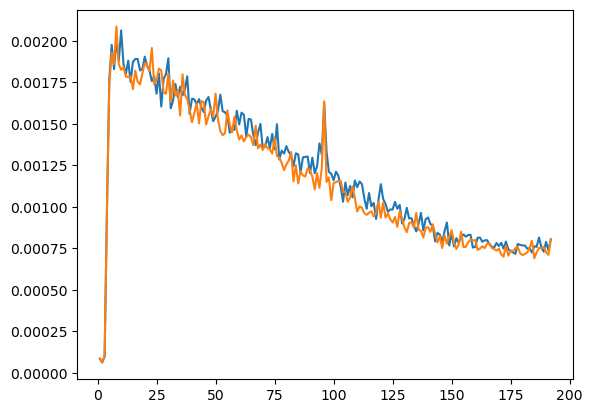

In [18]:
fpos = c_ds.isel(wavenumber=5).sel(frequency=slice(0,None))['symmetric']
fneg = c_ds.isel(wavenumber=5).sel(frequency=slice(None,0))['symmetric']
print(fpos)
print(fneg)
plt.plot(fpos)
plt.plot(fneg[::-1])

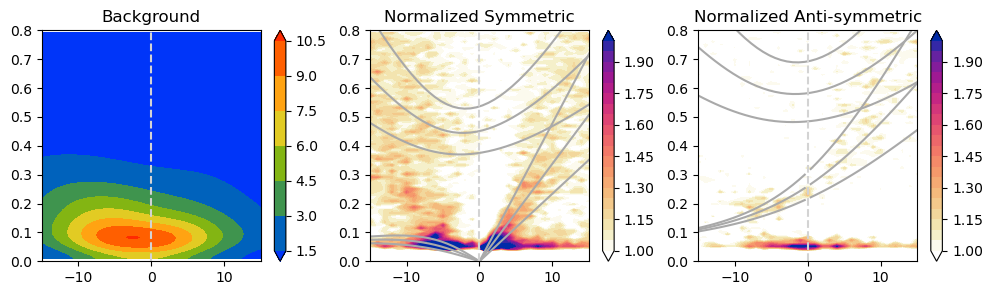

In [5]:
fig, ax = plt.subplots(figsize=(12,3), ncols=3)
plot_background_spectrum(fig, ax[0], c_ds['background'].load())
plot_normalized_symmetric_spectrum(fig, ax[1], c_ds['symmetric']/c_ds['background'], ofil=None)
plot_normalized_asymmetric_spectrum(fig, ax[2], c_ds['antisymmetric']/c_ds['background'], ofil=None)
fig.savefig("/glade/work/brianpm/trbelt_derived/ctr_wk_flut_h2.pdf", bbox_inches='tight', dpi=300)

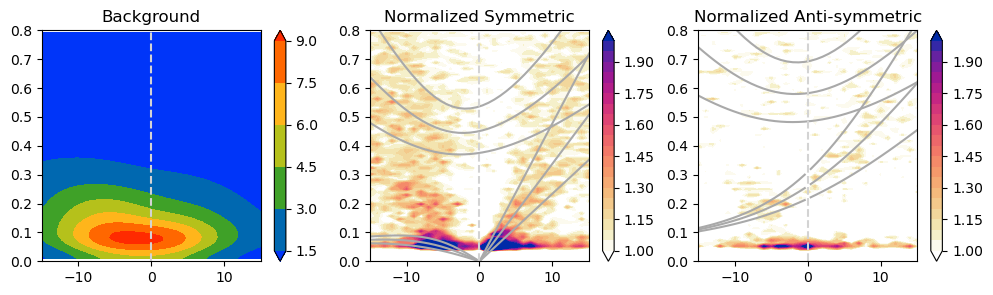

In [6]:
fig, ax = plt.subplots(figsize=(12,3), ncols=3)
plot_background_spectrum(fig, ax[0], s_ds['background'].load())
plot_normalized_symmetric_spectrum(fig, ax[1], s_ds['symmetric']/s_ds['background'], ofil=None)
plot_normalized_asymmetric_spectrum(fig, ax[2], s_ds['antisymmetric']/s_ds['background'], ofil=None)
fig.savefig("/glade/work/brianpm/trbelt_derived/sdt_wk_flut_h2.pdf", bbox_inches='tight', dpi=300)

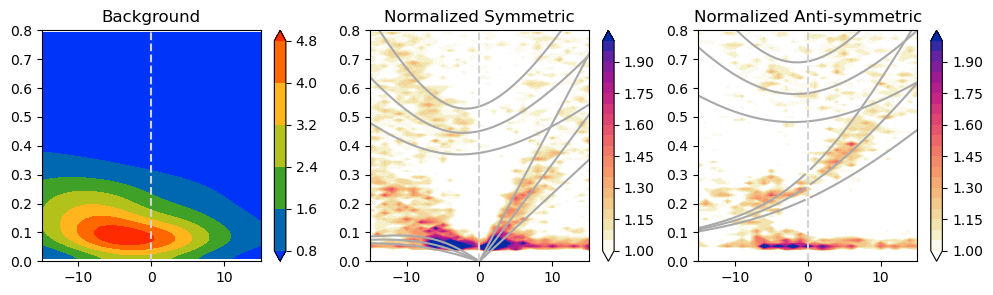

In [7]:
fig, ax = plt.subplots(figsize=(12,3), ncols=3)
plot_background_spectrum(fig, ax[0], t_ds['background'].load())
plot_normalized_symmetric_spectrum(fig, ax[1], t_ds['symmetric']/t_ds['background'], ofil=None)
plot_normalized_asymmetric_spectrum(fig, ax[2], t_ds['antisymmetric']/t_ds['background'], ofil=None)
fig.savefig("/glade/work/brianpm/trbelt_derived/blt_wk_flut_h2.pdf", bbox_inches='tight', dpi=300)

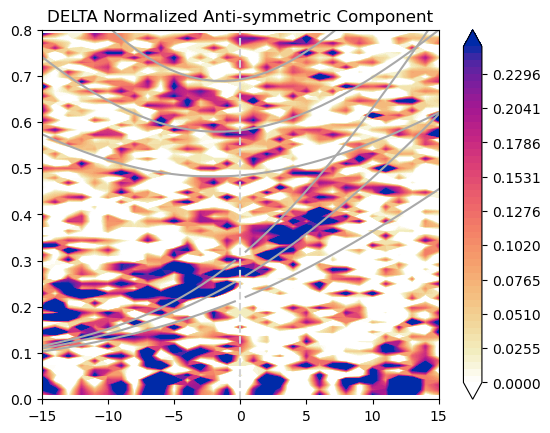

In [46]:
fig, ax = plt.subplots()

fb = [0, .8]  # frequency bounds for plot
# get data for dispersion curves:
swfreq,swwn = wf.genDispersionCurves()
# swfreq.shape # -->(6, 3, 50)
swf = np.where(swfreq == 1e20, np.nan, swfreq)
swk = np.where(swwn == 1e20, np.nan, swwn)

c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS

s = ((t_ds['antisymmetric']/t_ds['background']) - (c_ds['antisymmetric']/c_ds['background']))/(c_ds['antisymmetric']/c_ds['background'])

z = s.transpose().sel(frequency=slice(*fb), wavenumber=slice(-15,15))
z.loc[{'frequency':0}] = np.nan
kmesh0, vmesh0 = np.meshgrid(z['wavenumber'], z['frequency'])
img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(0, .25), cmap=cc.cm.CET_L17, extend='both')
for ii in range(0,3):
    ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
    ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
    ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
ax.axvline(0, linestyle='dashed', color='lightgray')
ax.set_xlim([-15,15])
ax.set_ylim(fb)
ax.set_title("DELTA Normalized Anti-symmetric Component")
fig.colorbar(img)

In [ ]:
# COMBINE PLOTS
fig, ax = plt.subplots(figsize=(12,3), ncols=3, nrows=3)
plot_background_spectrum(fig, ax[0], c_ds['background'].load())
plot_normalized_symmetric_spectrum(fig, ax[1], c_ds['symmetric']/c_ds['background'], ofil=None)
plot_normalized_asymmetric_spectrum(fig, ax[2], c_ds['antisymmetric']/c_ds['background'], ofil=None)
fig.savefig("/glade/work/brianpm/trbelt_derived/ctr_wk_flut_h2.pdf", bbox_inches='tight', dpi=300)


fig, ax = plt.subplots(figsize=(12,3), ncols=3)
plot_background_spectrum(fig, ax[0], s_ds['background'].load())
plot_normalized_symmetric_spectrum(fig, ax[1], s_ds['symmetric']/s_ds['background'], ofil=None)
plot_normalized_asymmetric_spectrum(fig, ax[2], s_ds['antisymmetric']/s_ds['background'], ofil=None)
fig.savefig("/glade/work/brianpm/trbelt_derived/sdt_wk_flut_h2.pdf", bbox_inches='tight', dpi=300)

fig, ax = plt.subplots(figsize=(12,3), ncols=3)
plot_background_spectrum(fig, ax[0], t_ds['background'].load())
plot_normalized_symmetric_spectrum(fig, ax[1], t_ds['symmetric']/t_ds['background'], ofil=None)
plot_normalized_asymmetric_spectrum(fig, ax[2], t_ds['antisymmetric']/t_ds['background'], ofil=None)
fig.savefig("/glade/work/brianpm/trbelt_derived/blt_wk_flut_h2.pdf", bbox_inches='tight', dpi=300)